<a href="https://colab.research.google.com/github/helen246/AIknowthatfeel/blob/master/ecualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accedemos a direcotiro de imagenes
**texto en negrita**

In [0]:
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive/', force_remount = True)

#!ls dir

Mounted at /content/drive/


Implementación de la ecualización

In [0]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

#def main():
path = "/content/drive/My Drive/Converciencia/imgs/"
img_file_Str = 'img1.jpg' 

#cv2.IMREAD_COLOR
img = cv2.imread(path  + img_file_Str)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

alto = img.shape[0]
ancho =  img.shape[1]

ecualizeImage = np.zeros((alto, ancho, 1)) #matriz para imagen escala de grises.

intensidad = range(0, 256)
ocurrencias = np.zeros((256)) #Arreglo de Intensidades.

for i in range(0, alto):
    for j in range(0, ancho):
        pixel = img[i, j]
        ocurrencias[pixel] = ocurrencias[pixel] + 1 

densidad = np.true_divide(ocurrencias, (ancho*alto))

#CDF
cdfDensidad = np.cumsum(densidad, dtype=float)

for i in range(0, alto):
    for j in range(0, ancho):
        pixel = img[i, j]
        newPixel = (255)*cdfDensidad[pixel]
        ecualizeImage[i, j] = round(newPixel, 0)

cv2.imwrite('salida_ecualizada.jpg', ecualizeImage)




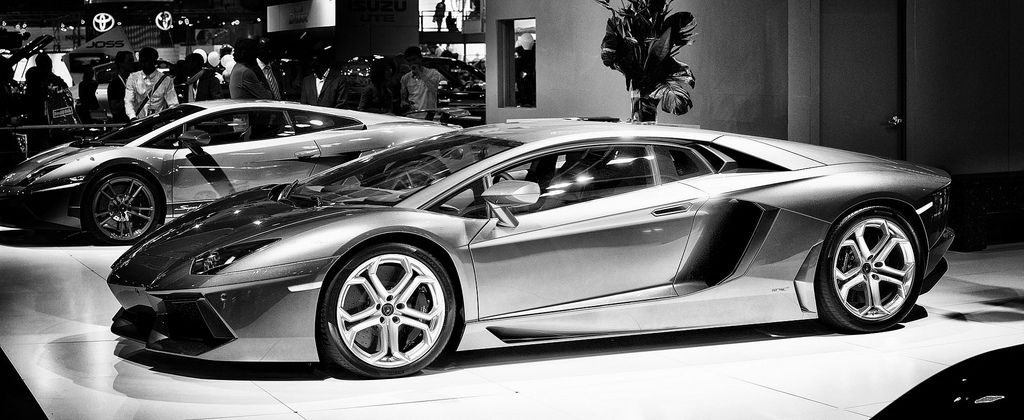

In [0]:
#imagen Original
cv2_imshow(img)

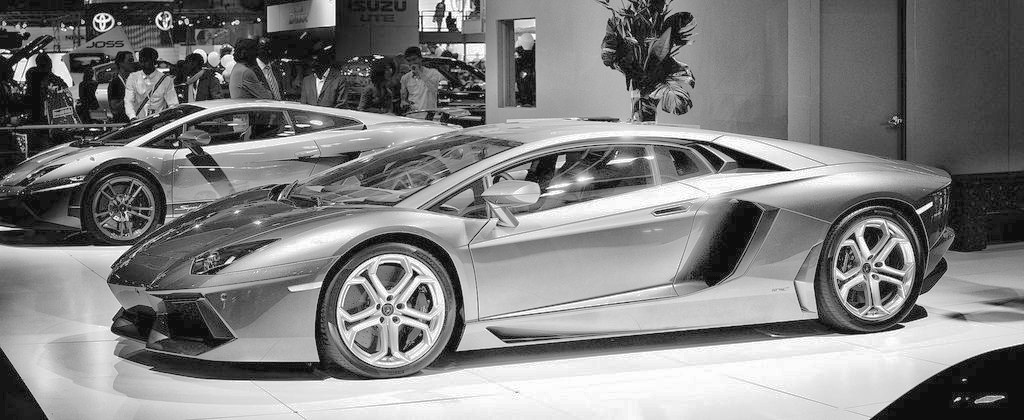

In [0]:
#cargamos imagen caualizada
imgEcualizada = cv2.imread('salida_ecualizada.jpg')
cv2_imshow(imgEcualizada)

Text(0.5, 1.0, 'Histograma Original')

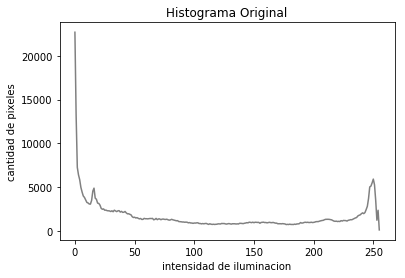

In [0]:
#histograma original
hist1 = cv2.calcHist([img], [0], None, [256], [0, 256])
orig = plt.figure(1)
plt.plot(hist1, color='gray' )
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.title('Histograma Original')

Text(0.5, 1.0, 'Histograma Ecualizado')

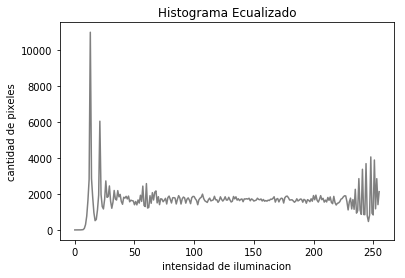

In [0]:
#histograma ecualizado
hist2 = cv2.calcHist([imgEcualizada], [0], None, [256], [0, 256])
ecua = plt.figure(2)
plt.plot(hist2, color='gray' )
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.title('Histograma Ecualizado')

#plt.show()

Llamamos a nuestra funcion principal